In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
pwd

'C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease'

In [4]:
x_train=train_datagen.flow_from_directory('C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\train_set',
                                          target_size=(128,128),class_mode='categorical',batch_size=64)
x_test=test_datagen.flow_from_directory('C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set',
                                          target_size=(128,128),class_mode='categorical',batch_size=64)

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [5]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [7]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,kernel_initializer = 'uniform',activation ='relu'))
model.add(Dense(150, kernel_initializer ='uniform',activation ='relu'))
model.add(Dense(75, kernel_initializer ='uniform',activation ='relu'))
model.add(Dense(9, kernel_initializer ='uniform',activation ='softmax'))

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [9]:
len(x_train)

178

In [10]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=20)

Epoch 1/20
178/178 [==============================] - 210s 1s/step - loss: 1.5855 - accuracy: 0.4065 - val_loss: 1.0454 - val_accuracy: 0.6291
Epoch 2/20
178/178 [==============================] - 209s 1s/step - loss: 0.9187 - accuracy: 0.6685 - val_loss: 0.9843 - val_accuracy: 0.6487
Epoch 3/20
178/178 [==============================] - 206s 1s/step - loss: 0.6194 - accuracy: 0.7751 - val_loss: 0.5655 - val_accuracy: 0.7725
Epoch 4/20
178/178 [==============================] - 204s 1s/step - loss: 0.4954 - accuracy: 0.8224 - val_loss: 0.4793 - val_accuracy: 0.8267
Epoch 5/20
178/178 [==============================] - 204s 1s/step - loss: 0.3909 - accuracy: 0.8634 - val_loss: 0.5720 - val_accuracy: 0.7889
Epoch 6/20
178/178 [==============================] - 204s 1s/step - loss: 0.3582 - accuracy: 0.8748 - val_loss: 0.2653 - val_accuracy: 0.9005
Epoch 7/20
178/178 [==============================] - 204s 1s/step - loss: 0.3040 - accuracy: 0.8915 - val_loss: 0.2858 - val_accuracy: 0.8984

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                        

In [12]:
model.save('vegetable.h5') 

In [1]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
model=load_model('vegetable.h5')

In [3]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set\\Tomato___Septoria_leaf_spot\\c551c562-b93a-4b2e-9058-12519414b3ff___Matt.S_CG 2882.jpg", target_size=(128,128))

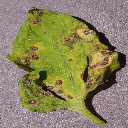

In [4]:
img

In [5]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis = 0)

In [6]:
y=model.predict(x)

In [7]:
y

array([[0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [8]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [9]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set\\Pepper,_bell___Bacterial_spot\\afd0c913-1e90-4ff9-9a61-bd0a5297c012___JR_B.Spot 3221.jpg", target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Pepper,_bell___Bacterial_spot'

In [10]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set\\Pepper,_bell___healthy\\b91d515b-9f44-4a63-aa2b-e7b3f2ea0fec___JR_HL 8312.jpg", target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Pepper,_bell___healthy'

In [11]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set\\Potato___Early_blight\\c03a3f69-00b7-4aa5-a49f-794416af0598___RS_Early.B 8112.jpg", target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Potato___Early_blight'

In [13]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set\\Potato___healthy\\b42621c3-f751-46e1-a8d2-83ed85b90554___RS_HL 1740.jpg", target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Potato___healthy'

In [14]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set\\Potato___Late_blight\\de63bbba-d8d0-4e74-95d7-6d5adfcd0955___RS_LB 3222.jpg", target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Tomato___Late_blight'

In [26]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set\\Tomato___Bacterial_spot\\bd7ff95f-02e5-491a-8bf9-5f2ac2277e7c___UF.GRC_BS_Lab Leaf 0932.jpg", target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Tomato___Septoria_leaf_spot'

In [15]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set\\Tomato___Late_blight\\b5e5a3bd-a8c8-46fc-928f-f0bb083b9a4e___GHLB2 Leaf 8550.jpg", target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Tomato___Late_blight'

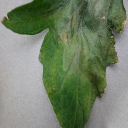

In [28]:
img

In [29]:
img=image.load_img("C:\\Users\\91978\\Desktop\\Python Projects\\IBM Buildathon\\Project Building\\Dataset Plant Disease\\Veg-dataset\\Veg-dataset\\test_set\\\Tomato___Leaf_Mold\\af7e1ce4-bb49-4227-ba89-9972bab473b7___Crnl_L.Mold 6560.jpg", target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#x_train.class_indices
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Tomato___Septoria_leaf_spot'